In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

%matplotlib inline

In [45]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join(os.getcwd(),"resources")

### figure formatting

In [65]:
font={
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) + cycler('linestyle', ['-', '--', ':', '-.'])")

def create_fig():
    figure,ax = plt.subplots(figsize=(5,3))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

## Infinite plane

In [47]:
# get file from
dat = pd.read_csv(os.path.join(SRC_DIR,"inf_plane_data_.csv"))

colocated

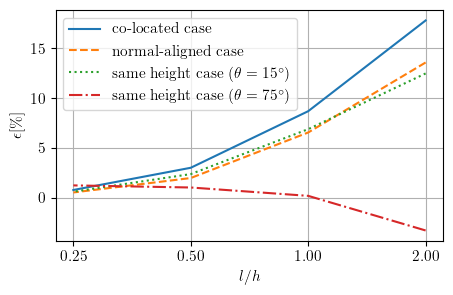

In [66]:
num_patches = (50/dat["patch_size"][:])**2
patch_ratio = dat["patch_size"][:]/2
psize = np.array(dat["patch_size"][:])


# relative error as a function of patch size
f,a = create_fig()
plt.semilogx(patch_ratio[:],dat["col_rel"][:])
plt.semilogx(patch_ratio[:],dat["dif_rel"][:])
plt.semilogx(patch_ratio[:],dat["var_rel_15"][:])
plt.semilogx(patch_ratio[:],dat["var_rel_75"][:])
plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$ l/h $$")
a.xaxis.set_minor_locator(mticker.LogLocator())
a.xaxis.set_major_formatter(mticker.ScalarFormatter())
a.set_xticks([.25,.5,1,2])
plt.legend(["co-located case","normal-aligned case","same height case ($\\theta=15^{\circ}$)","same height case ($\\theta=75^{\circ}$)"])
plt.show()
export_fig(f,"patchsize_rel")



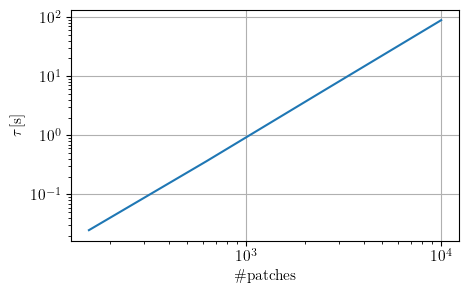

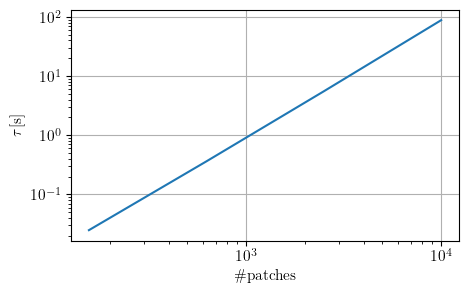

In [49]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$\\tau [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

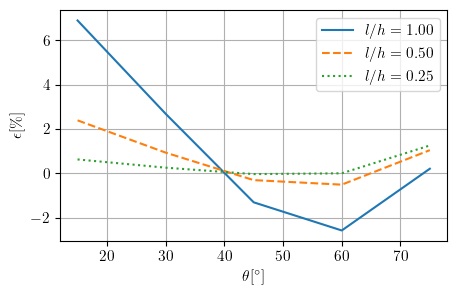

In [67]:

angles = np.arange(15,90,15)
f,a = create_fig()
legend = []
for i,ratio in enumerate(patch_ratio[1:]):
    data_list = []
    for ang in angles:
        data_list.append(dat["var_rel_"+f'{ang}'][i+1])

    plt.plot(angles,data_list)

    legend.append(f'$$l/h={ratio:.2f}$$')

plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$\\theta [^{\circ}]$$")
plt.legend(legend)
plt.show()
export_fig(f,"var_rel")